In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import mesaPlot as mp
import pandas as pd
from custom_mpl_settings import load_mpl_rc
load_mpl_rc()
cmap = plt.get_cmap('viridis')
m = mp.MESA()

In [28]:
Mc = [0.62,0.64,0.82,0.88,0.96,1.05]
Menv = [0.02,0.32,0.95,1.04,1.2,1.34]
plt.plot(Mc,Menv,marker='o')

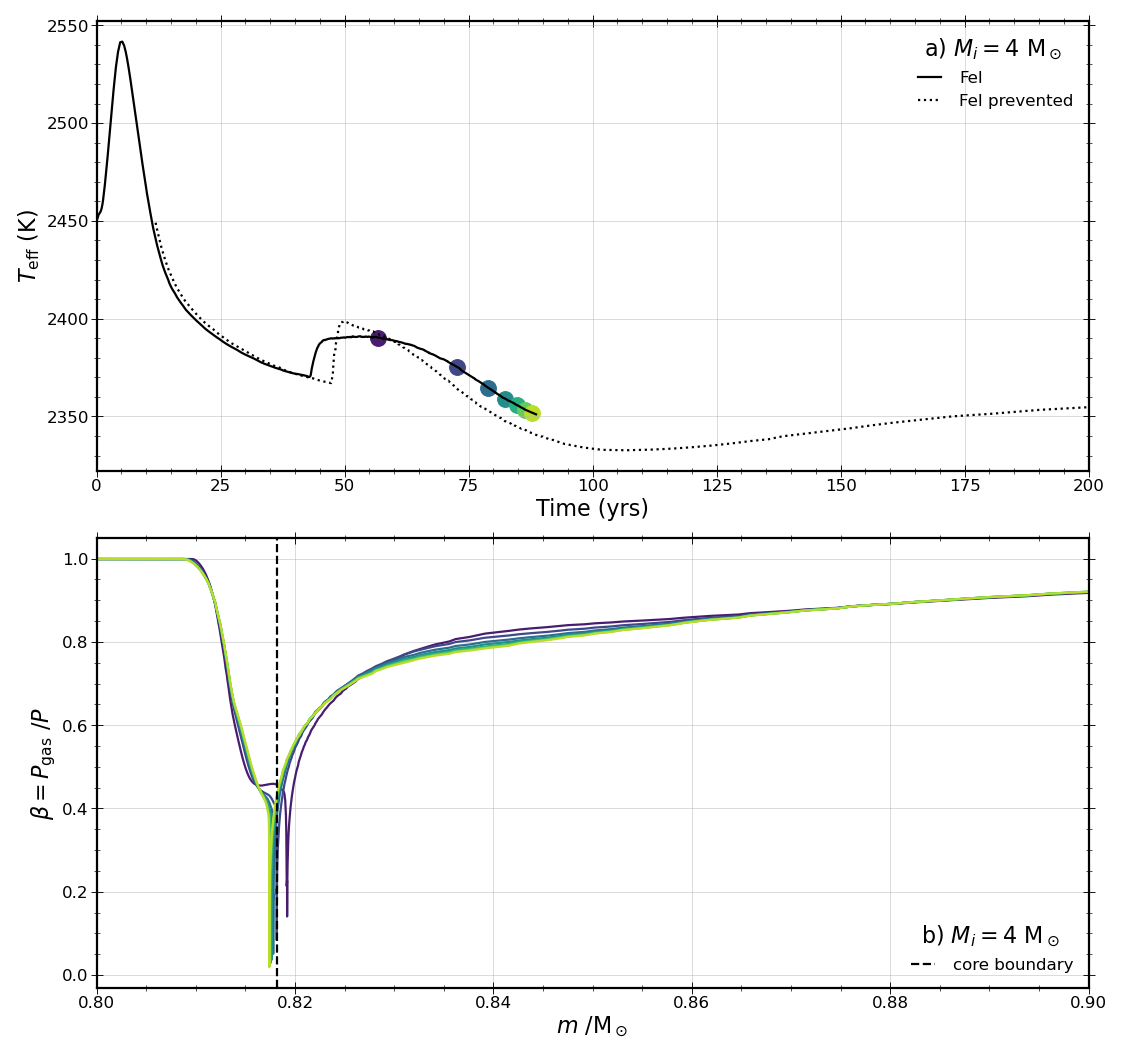

In [26]:
Tmax = 5.0
logs_folder = '/Users/natalierees/agb_grid_23051/Z0.014/4.0/LOGS_TPAGB_FeI'
profiles_index_file = os.path.join(logs_folder,'profiles.index')
df_profiles = pd.read_csv(profiles_index_file,index_col=[0],sep='\s+')

fig,ax=plt.subplots(2,1,figsize=(16,16))
m.loadHistory(logs_folder)
start_model_number = 114000
locs = np.where(m.hist.model_number>start_model_number)

t0 = m.hist.star_age[locs][0]
ax[0].plot(m.hist.star_age[locs]-t0,10**m.hist.log_Teff[locs],c='black',ls='-',label="FeI")
m0 = m.hist.model_number[locs][0]
delta_m = m.hist.model_number[locs][-1]-m0

m.loadHistory('/Users/natalierees/agb_grid_23051/Z0.014/4.0/LOGS_TPAGB_prevent_FeI')
locs2 = np.where(m.hist.model_number>start_model_number)
ax[0].plot(m.hist.star_age[locs2]-t0,10**m.hist.log_Teff[locs2],c='black',ls=':',label="FeI prevented")

for model_number in [mod for mod in df_profiles.index if mod>start_model_number]:
    m.loadProfile(logs_folder,num=int(model_number),silent=True)
    color = cmap((m.prof.model_number-m0)/delta_m)

    ax[0].scatter(m.prof.star_age-t0,m.prof.Teff,color=color,alpha=1.0,s=200)
    filter = np.where((m.prof.logT>4)&(m.prof.logT<7))
    ax[1].plot(m.prof.mass,m.prof.beta,c=color,alpha=1.0,ls='-')

ax[0].set_xlim(0,200)
ax[1].set_xlim(0.8,0.9)
ax[0].set(ylabel='$T_\mathrm{eff}~(\mathrm{K})$',xlabel='Time (yrs)')
ax[1].set(ylabel=r'$\beta=P_\mathrm{gas}~/P$',xlabel='$m~/\mathrm{M}_\odot$')
ax[1].axvline(m.hist.he_core_mass[-1],c='black',ls='--',label='core boundary')

ax[0].legend(title='a) $M_i = 4~\mathrm{M}_\odot$',frameon=False)
ax[1].legend(title='b) $M_i = 4~\mathrm{M}_\odot$',frameon=False)
plt.subplots_adjust(hspace=0.15)
plt.savefig('plots/FeI_4M.jpeg',dpi=200)
plt.show()

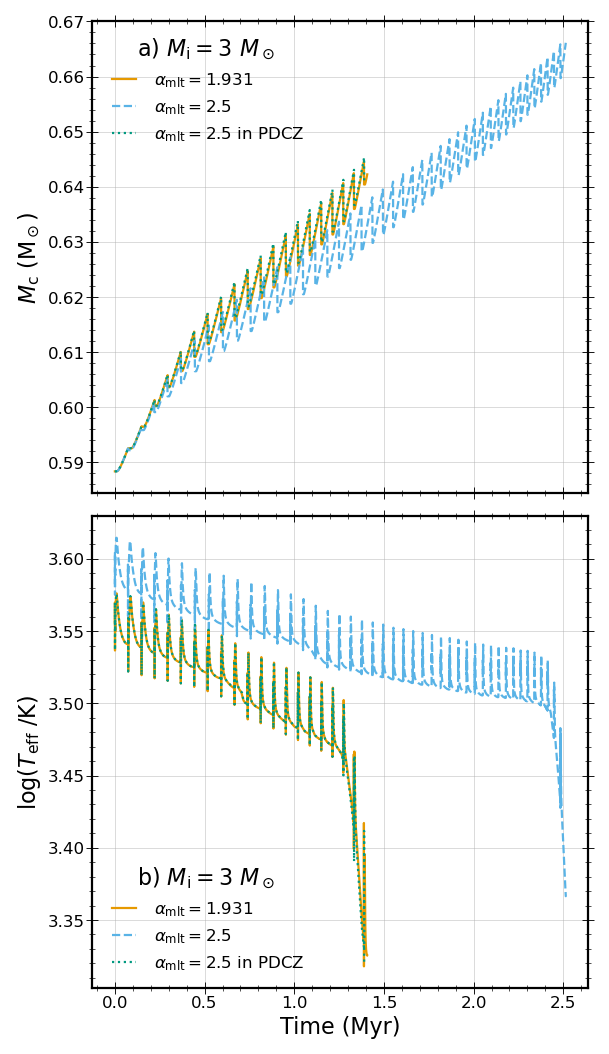

In [3]:
fig,ax=plt.subplots(2,1,figsize=(8,16),sharex=True)

m.loadHistory('/Users/natalierees/agb_grid_23051/Z0.014/3.0/LOGS_TPAGB_FeI')
ax[0].plot(m.hist.star_age/1e6,m.hist.he_core_mass,label=r'$\alpha_\mathrm{mlt}=1.931$')
ax[1].plot(m.hist.star_age/1e6,m.hist.log_Teff,label=r'$\alpha_\mathrm{mlt}=1.931$')
m.loadHistory('/Users/natalierees/agb_grid_23051/Z0.014/3.0/LOGS_TPAGB_alpha_2.5')
ax[0].plot(m.hist.star_age/1e6,m.hist.he_core_mass,label=r'$\alpha_\mathrm{mlt}=2.5$')
ax[1].plot(m.hist.star_age/1e6,m.hist.log_Teff,label=r'$\alpha_\mathrm{mlt}=2.5$')
m.loadHistory('/Users/natalierees/agb_grid_23051/Z0.014/3.0/LOGS_TPAGB_alpha_PDCZ_2.5')
ax[0].plot(m.hist.star_age/1e6,m.hist.he_core_mass,label=r'$\alpha_\mathrm{mlt}=2.5$ in PDCZ')
ax[1].plot(m.hist.star_age/1e6,m.hist.log_Teff,label=r'$\alpha_\mathrm{mlt}=2.5$ in PDCZ')

ax[0].legend(title='a) $M_\mathrm{i}=3~M_\odot$',frameon=False)
ax[1].legend(title='b) $M_\mathrm{i}=3~M_\odot$',frameon=False)
ax[0].set(ylabel='$M_\mathrm{c}~(\mathrm{M}_\odot)$')
ax[1].set(xlabel='Time (Myr)',ylabel='$\log(T_\mathrm{eff}~/\mathrm{K})$')

plt.savefig('plots/alphamlt_comp.jpeg',dpi=200)
plt.show()


/Users/natalierees/agb_grid_23051/Z0.014/3.0/LOGS_TPAGB_alpha_2.5/profile1.data
/Users/natalierees/agb_grid_23051/Z0.014/3.0/LOGS_TPAGB_alpha_PDCZ_2.5/profile1.data


[Text(0, 0.5, 'mixing length parameter')]

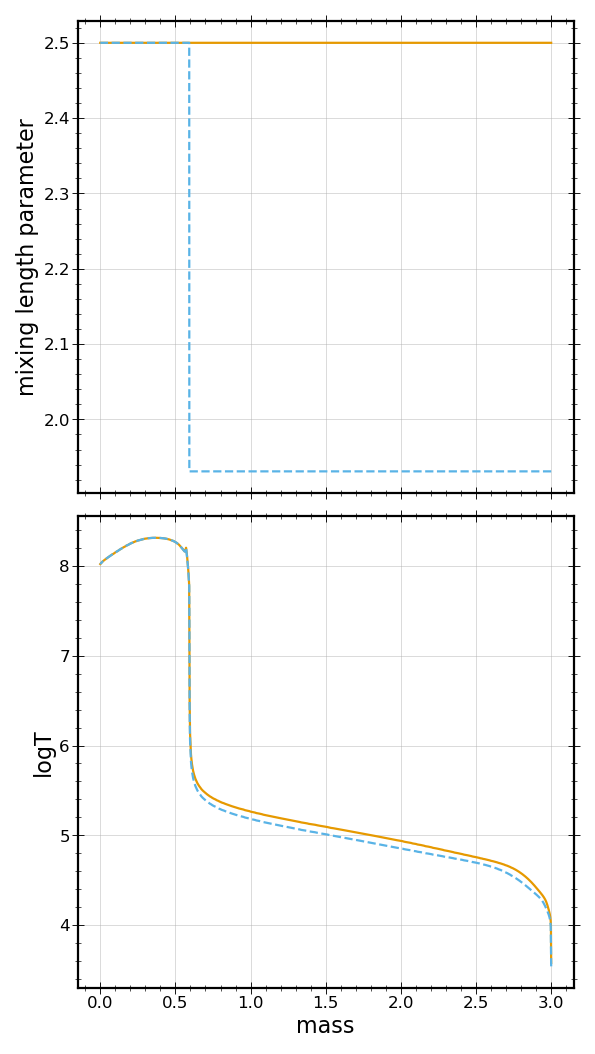

In [6]:
fig,ax=plt.subplots(2,1,figsize=(8,16),sharex=True)

m.loadProfile('/Users/natalierees/agb_grid_23051/Z0.014/3.0/LOGS_TPAGB_alpha_2.5',prof=1)
ax[0].plot(m.prof.mass,m.prof.alpha_mlt)
ax[1].plot(m.prof.mass,m.prof.logT)
m.loadProfile('/Users/natalierees/agb_grid_23051/Z0.014/3.0/LOGS_TPAGB_alpha_PDCZ_2.5',prof=1)
ax[0].plot(m.prof.mass,m.prof.alpha_mlt)
ax[1].plot(m.prof.mass,m.prof.logT)

ax[1].set(xlabel='mass',ylabel='logT')
ax[0].set(ylabel='mixing length parameter')

In [ ]:
m.prof.model_number